In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance

In [4]:
df = pd.read_csv('data.csv')

In [5]:

columns_to_label_encode = ['NOMBRE_UNIDAD_EDUC', 'NOMBRE_COMUNA_EGRESO',
                            'PAGO_MATRICULA2020', 'PAGO_MENSUAL2020', 'PAGO_MATRICULA2021', 'PAGO_MENSUAL2021',
                            'PAGO_MATRICULA2022', 'PAGO_MENSUAL2022', 'PAGO_MATRICULA2023', 'PAGO_MENSUAL2023']

label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])

In [6]:

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [7]:
data = df_normalized.drop(['MRUN', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX', ], axis=1).values
columns = df_normalized.drop(['MRUN', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX', ], axis=1).columns
target = df_normalized['PROMEDIO_CM_MAX'].values


In [8]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [9]:
#Model 1

mlp = MLPRegressor(hidden_layer_sizes=(64, 1),  # Ajustar el tamaño y número de capas ocultas
                   activation='relu',  # Función de activación ReLU
                   solver='adam',  # Optimizador Adam
                   alpha=0.01,  # Regularización L2
                   learning_rate='constant', # Tasa de aprendizaje constant
                   learning_rate_init=0.01,
                   max_iter=50,  # Aumentar el número máximo de iteraciones
                   batch_size=32,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

"""
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (64, 64), (128, 128), (256, 256), (64, 64, 64), (128, 128, 128), (256, 256, 256)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'rmsprop'],
    'alpha': [0.01, 0.001, 0.0001],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128],
    'max_iter': [50, 100],
    'early_stopping': [True],
    'n_iter_no_change': [5, 10]
}

"""

"\nparam_grid = {\n    'hidden_layer_sizes': [(64,), (128,), (256,), (64, 64), (128, 128), (256, 256), (64, 64, 64), (128, 128, 128), (256, 256, 256)],\n    'activation': ['relu', 'tanh'],\n    'solver': ['adam', 'rmsprop'],\n    'alpha': [0.01, 0.001, 0.0001],\n    'learning_rate_init': [0.01, 0.001, 0.0001],\n    'batch_size': [32, 64, 128],\n    'max_iter': [50, 100],\n    'early_stopping': [True],\n    'n_iter_no_change': [5, 10]\n}\n\n"

In [10]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.0190647526425903
Testing Mean Absolute Error: 0.11201825372201517
Test R-squared: 0.2479575822352208


                 feature  importance
7               PTJE_NEM    0.294414
5         ANYO_DE_EGRESO    0.071622
8         PORC_SUP_NOTAS    0.061855
0               COD_SEXO    0.048192
9           PTJE_RANKING    0.033370
31      PAGO_MENSUAL2023    0.016669
17              EDAD_ALU    0.013590
30    PAGO_MATRICULA2023    0.009756
2     NOMBRE_UNIDAD_EDUC    0.008010
3            DEPENDENCIA    0.005624
6         PROMEDIO_NOTAS    0.004433
29      PAGO_MENSUAL2022    0.001340
1                    RBD    0.001134
32                 RURAL    0.000917
25      PAGO_MENSUAL2020    0.000848
4   NOMBRE_COMUNA_EGRESO    0.000776
15        ASISTENCIA2022    0.000656
22           COD_COM_RBD    0.000518
19         PROM_GRAL2023    0.000517
13        ASISTENCIA2021    0.000463
14         PROM_GRAL2022    0.000271
21               COD_JOR    0.000195
28    PAGO_MATRICULA2022    0.000091
18       COD_COM_ALU2023    0.000029
20        ASISTENCIA2023    0.000020
26    PAGO_MATRICULA2021    0.000017
1

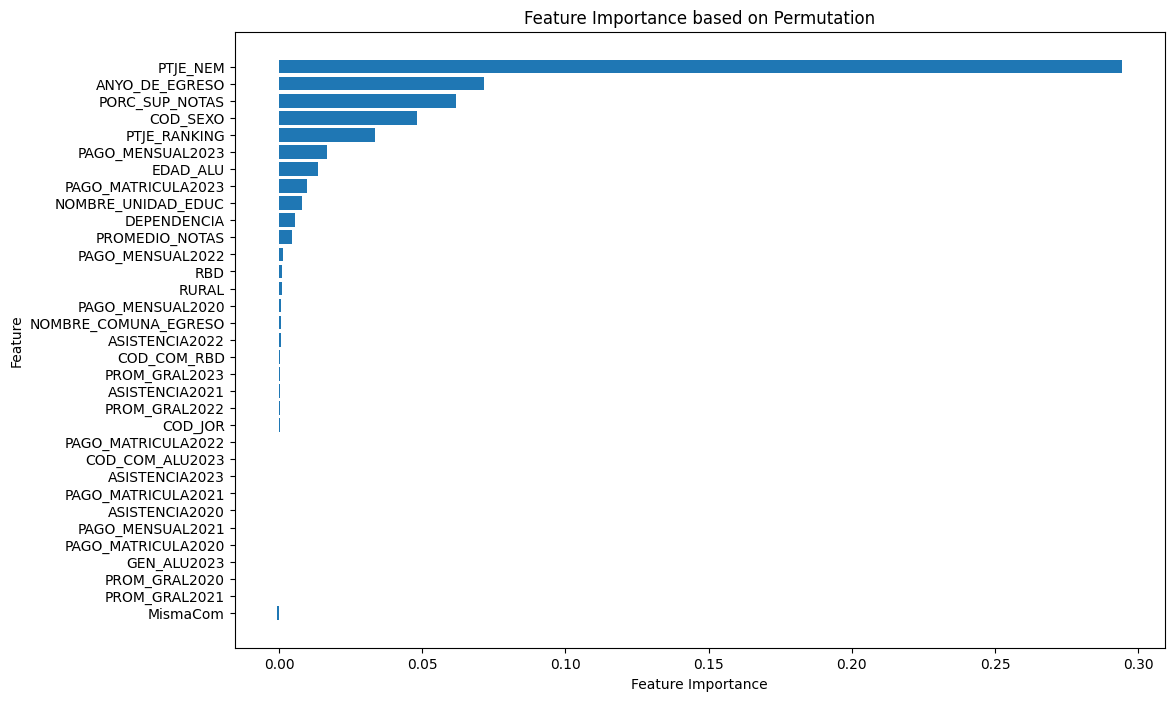

In [11]:


# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [12]:
#Model 2

mlp = MLPRegressor(hidden_layer_sizes=(128, 2),  # Ajustar el tamaño y número de capas ocultas
                   activation='relu',  # Función de activación ReLU
                   solver='adam',  # Optimizador Adam
                   alpha=0.001,  # Regularización L2
                   learning_rate='constant', # Tasa de aprendizaje constant
                   learning_rate_init=0.001,
                   max_iter=50,  # Aumentar el número máximo de iteraciones
                   batch_size=64,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPRegressor(alpha=0.001, batch_size=64, hidden_layer_sizes=(128, 2),
             max_iter=50, random_state=0)

In [13]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.013363950836500193
Testing Mean Absolute Error: 0.09214811734594032
Test R-squared: 0.47283565192872423


                 feature  importance
7               PTJE_NEM    0.597086
6         PROMEDIO_NOTAS    0.399650
9           PTJE_RANKING    0.317186
5         ANYO_DE_EGRESO    0.211825
17              EDAD_ALU    0.068304
3            DEPENDENCIA    0.053678
0               COD_SEXO    0.041335
31      PAGO_MENSUAL2023    0.020835
30    PAGO_MATRICULA2023    0.020399
8         PORC_SUP_NOTAS    0.014083
2     NOMBRE_UNIDAD_EDUC    0.010998
1                    RBD    0.004453
32                 RURAL    0.003301
4   NOMBRE_COMUNA_EGRESO    0.002384
28    PAGO_MATRICULA2022    0.001911
27      PAGO_MENSUAL2021    0.001829
29      PAGO_MENSUAL2022    0.001778
25      PAGO_MENSUAL2020    0.001588
26    PAGO_MATRICULA2021    0.001167
11        ASISTENCIA2020    0.000817
24    PAGO_MATRICULA2020    0.000605
21               COD_JOR    0.000216
16           GEN_ALU2023    0.000170
23              MismaCom    0.000149
22           COD_COM_RBD    0.000135
10         PROM_GRAL2020    0.000126
1

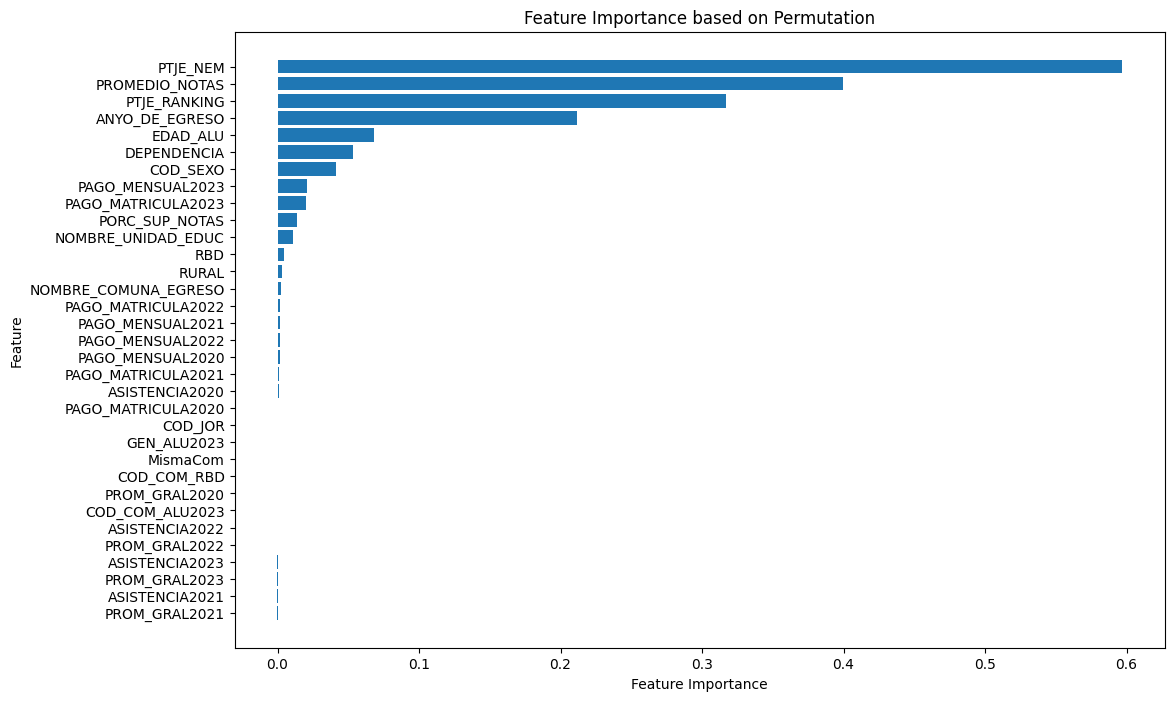

In [14]:
# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [15]:
#Model 3

mlp = MLPRegressor(hidden_layer_sizes=(256, 3),  # Ajustar el tamaño y número de capas ocultas
                   activation='relu',  # Función de activación ReLU
                   solver='adam',  # Optimizador Adam
                   alpha=0.001,  # Regularización L2
                   learning_rate='constant', # Tasa de aprendizaje constant
                   learning_rate_init=0.0001,
                   max_iter=100,  # Aumentar el número máximo de iteraciones
                   batch_size=128,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPRegressor(alpha=0.001, batch_size=128, hidden_layer_sizes=(256, 3),
             learning_rate_init=0.0001, max_iter=100, random_state=0)

In [16]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.013706496411933493
Testing Mean Absolute Error: 0.09357964378054641
Test R-squared: 0.4593233442910162


                 feature    importance
7               PTJE_NEM  9.368679e-01
5         ANYO_DE_EGRESO  1.542562e-01
9           PTJE_RANKING  7.670792e-02
0               COD_SEXO  4.050517e-02
17              EDAD_ALU  3.957487e-02
3            DEPENDENCIA  3.524861e-02
8         PORC_SUP_NOTAS  2.414070e-02
30    PAGO_MATRICULA2023  1.980450e-02
2     NOMBRE_UNIDAD_EDUC  1.682538e-02
31      PAGO_MENSUAL2023  1.107454e-02
6         PROMEDIO_NOTAS  6.111023e-03
1                    RBD  4.801262e-03
4   NOMBRE_COMUNA_EGRESO  4.589461e-03
28    PAGO_MATRICULA2022  4.205988e-03
32                 RURAL  4.192571e-03
18       COD_COM_ALU2023  3.886070e-03
29      PAGO_MENSUAL2022  3.386978e-03
22           COD_COM_RBD  2.640688e-03
27      PAGO_MENSUAL2021  2.289739e-03
15        ASISTENCIA2022  1.661059e-03
25      PAGO_MENSUAL2020  1.624260e-03
24    PAGO_MATRICULA2020  1.614575e-03
26    PAGO_MATRICULA2021  1.606437e-03
14         PROM_GRAL2022  1.521446e-03
19         PROM_GRAL2023 

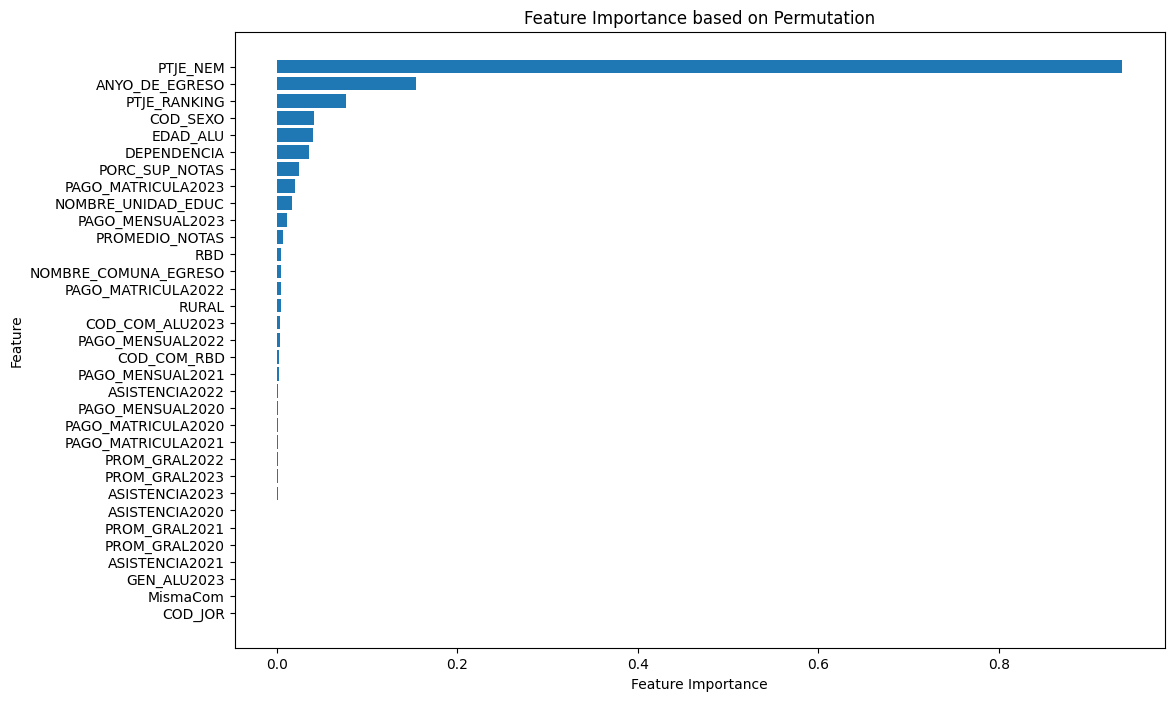

In [17]:


# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [18]:
#Model 4

mlp = MLPRegressor(hidden_layer_sizes=(256, 3),  # Ajustar el tamaño y número de capas ocultas
                   activation='tanh',  # Función de activación tanh
                   solver='lbfgs',  # Optimizador lbfgs
                   alpha=0.001,  # Regularización L2
                   learning_rate='constant', # Tasa de aprendizaje constant
                   learning_rate_init=0.0001,
                   max_iter=100,  # Aumentar el número máximo de iteraciones
                   batch_size=128,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=0.001, batch_size=128,
             hidden_layer_sizes=(256, 3), learning_rate_init=0.0001,
             max_iter=100, random_state=0, solver='lbfgs')

In [19]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.014273533922514776
Testing Mean Absolute Error: 0.09542046883248598
Test R-squared: 0.43695556074746156


                 feature  importance
7               PTJE_NEM    1.614139
5         ANYO_DE_EGRESO    0.343191
17              EDAD_ALU    0.116021
8         PORC_SUP_NOTAS    0.096195
6         PROMEDIO_NOTAS    0.047073
0               COD_SEXO    0.043608
30    PAGO_MATRICULA2023    0.016215
31      PAGO_MENSUAL2023    0.008826
9           PTJE_RANKING    0.008069
2     NOMBRE_UNIDAD_EDUC    0.007178
22           COD_COM_RBD    0.004739
3            DEPENDENCIA    0.004443
18       COD_COM_ALU2023    0.003919
32                 RURAL    0.002751
1                    RBD    0.002470
14         PROM_GRAL2022    0.001737
25      PAGO_MENSUAL2020    0.001579
26    PAGO_MATRICULA2021    0.001402
15        ASISTENCIA2022    0.001366
4   NOMBRE_COMUNA_EGRESO    0.001200
28    PAGO_MATRICULA2022    0.001120
27      PAGO_MENSUAL2021    0.000644
19         PROM_GRAL2023    0.000123
24    PAGO_MATRICULA2020    0.000041
11        ASISTENCIA2020    0.000031
29      PAGO_MENSUAL2022   -0.000003
1

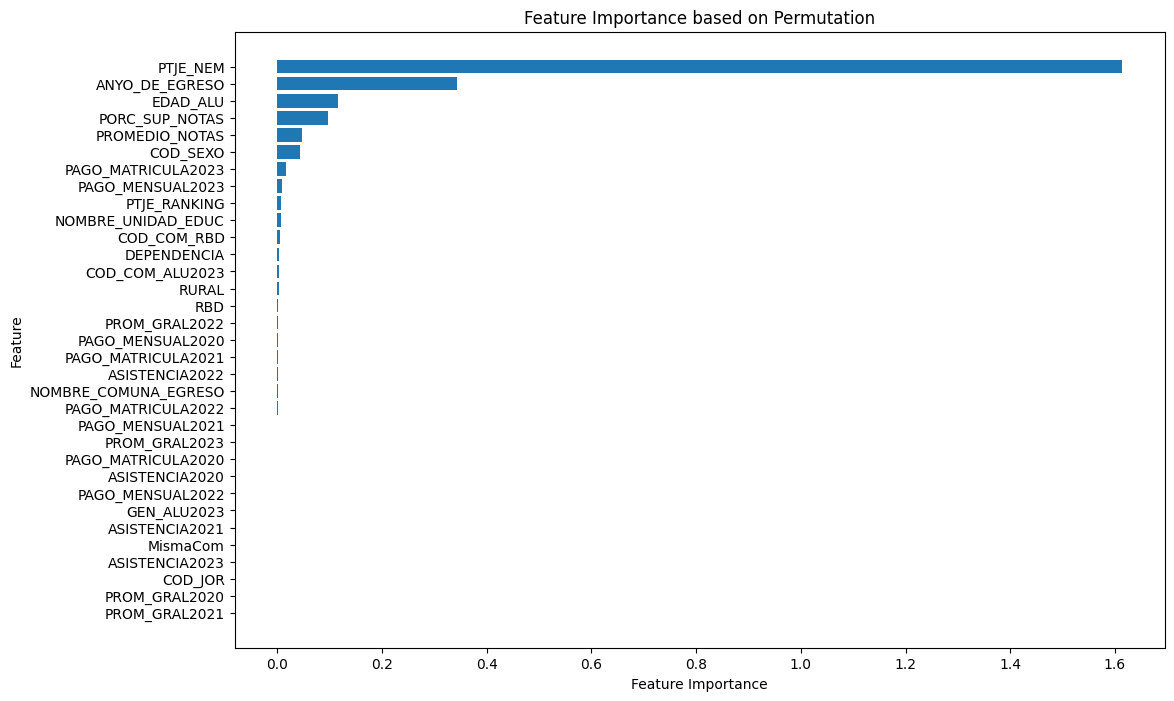

In [20]:
# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [21]:
#Model 5

mlp = MLPRegressor(hidden_layer_sizes=(256, 3),  # Ajustar el tamaño y número de capas ocultas
                   activation='tanh',  # Función de activación tanh
                   solver='adam',  # Optimizador adam
                   alpha=0.001,  # Regularización L2
                   learning_rate='constant', # Tasa de aprendizaje constant
                   learning_rate_init=0.0001,
                   max_iter=100,  # Aumentar el número máximo de iteraciones
                   batch_size=128,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.001, batch_size=128,
             hidden_layer_sizes=(256, 3), learning_rate_init=0.0001,
             max_iter=100, random_state=0)

In [22]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.014163500986130654
Testing Mean Absolute Error: 0.09547736251079023
Test R-squared: 0.44129600182547557


                 feature  importance
7               PTJE_NEM    1.170510
5         ANYO_DE_EGRESO    0.251838
9           PTJE_RANKING    0.102950
17              EDAD_ALU    0.086628
8         PORC_SUP_NOTAS    0.047144
0               COD_SEXO    0.042544
6         PROMEDIO_NOTAS    0.035515
31      PAGO_MENSUAL2023    0.013690
3            DEPENDENCIA    0.008365
30    PAGO_MATRICULA2023    0.007439
2     NOMBRE_UNIDAD_EDUC    0.006977
1                    RBD    0.003666
32                 RURAL    0.003110
4   NOMBRE_COMUNA_EGRESO    0.001890
22           COD_COM_RBD    0.001481
18       COD_COM_ALU2023    0.001283
29      PAGO_MENSUAL2022    0.001122
28    PAGO_MATRICULA2022    0.000852
25      PAGO_MENSUAL2020    0.000802
27      PAGO_MENSUAL2021    0.000309
15        ASISTENCIA2022    0.000208
26    PAGO_MATRICULA2021    0.000188
11        ASISTENCIA2020    0.000122
14         PROM_GRAL2022    0.000081
16           GEN_ALU2023    0.000044
23              MismaCom    0.000019
2

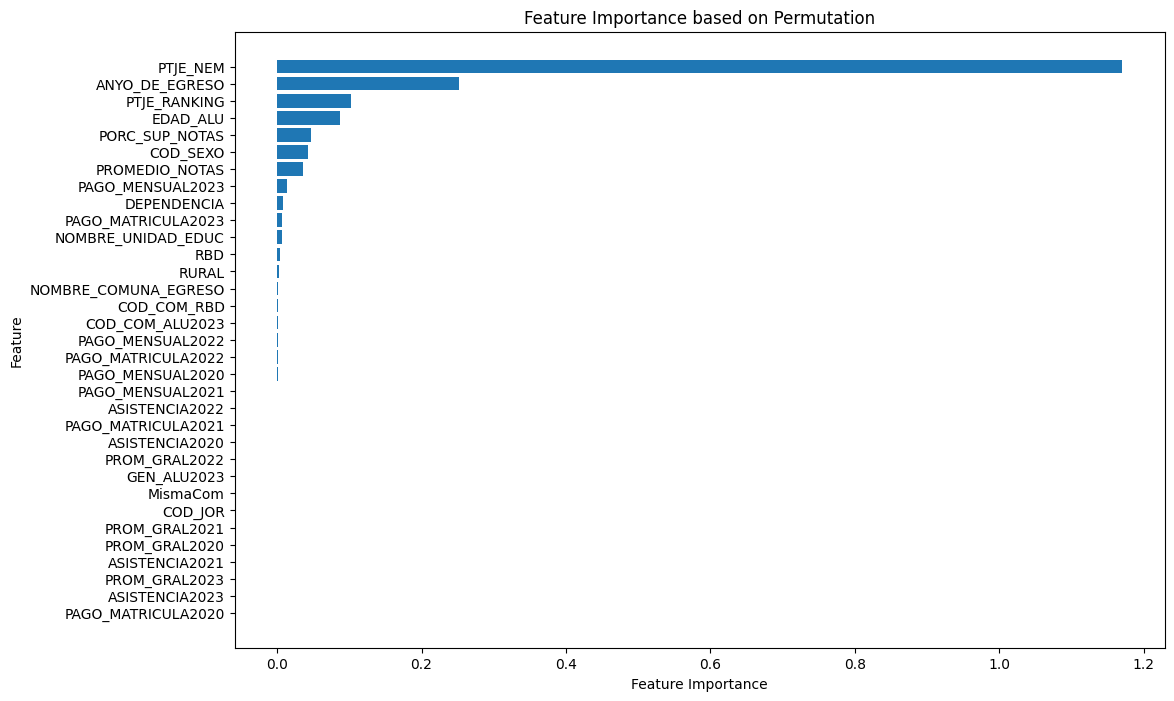

In [23]:
# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [24]:
#Model 6

mlp = MLPRegressor(hidden_layer_sizes=(256, 3),  # Ajustar el tamaño y número de capas ocultas
                   activation='relu',  # Función de activación relu
                   solver='adam',  # Optimizador adam
                   alpha=0.001,  # Regularización L2
                   learning_rate='adaptive', # Tasa de aprendizaje adaptive
                   learning_rate_init=0.0001,
                   max_iter=100,  # Aumentar el número máximo de iteraciones
                   batch_size=128,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPRegressor(alpha=0.001, batch_size=128, hidden_layer_sizes=(256, 3),
             learning_rate='adaptive', learning_rate_init=0.0001, max_iter=100,
             random_state=0)

In [25]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.013706496411933493
Testing Mean Absolute Error: 0.09357964378054641
Test R-squared: 0.4593233442910162


                 feature    importance
7               PTJE_NEM  9.368679e-01
5         ANYO_DE_EGRESO  1.542562e-01
9           PTJE_RANKING  7.670792e-02
0               COD_SEXO  4.050517e-02
17              EDAD_ALU  3.957487e-02
3            DEPENDENCIA  3.524861e-02
8         PORC_SUP_NOTAS  2.414070e-02
30    PAGO_MATRICULA2023  1.980450e-02
2     NOMBRE_UNIDAD_EDUC  1.682538e-02
31      PAGO_MENSUAL2023  1.107454e-02
6         PROMEDIO_NOTAS  6.111023e-03
1                    RBD  4.801262e-03
4   NOMBRE_COMUNA_EGRESO  4.589461e-03
28    PAGO_MATRICULA2022  4.205988e-03
32                 RURAL  4.192571e-03
18       COD_COM_ALU2023  3.886070e-03
29      PAGO_MENSUAL2022  3.386978e-03
22           COD_COM_RBD  2.640688e-03
27      PAGO_MENSUAL2021  2.289739e-03
15        ASISTENCIA2022  1.661059e-03
25      PAGO_MENSUAL2020  1.624260e-03
24    PAGO_MATRICULA2020  1.614575e-03
26    PAGO_MATRICULA2021  1.606437e-03
14         PROM_GRAL2022  1.521446e-03
19         PROM_GRAL2023 

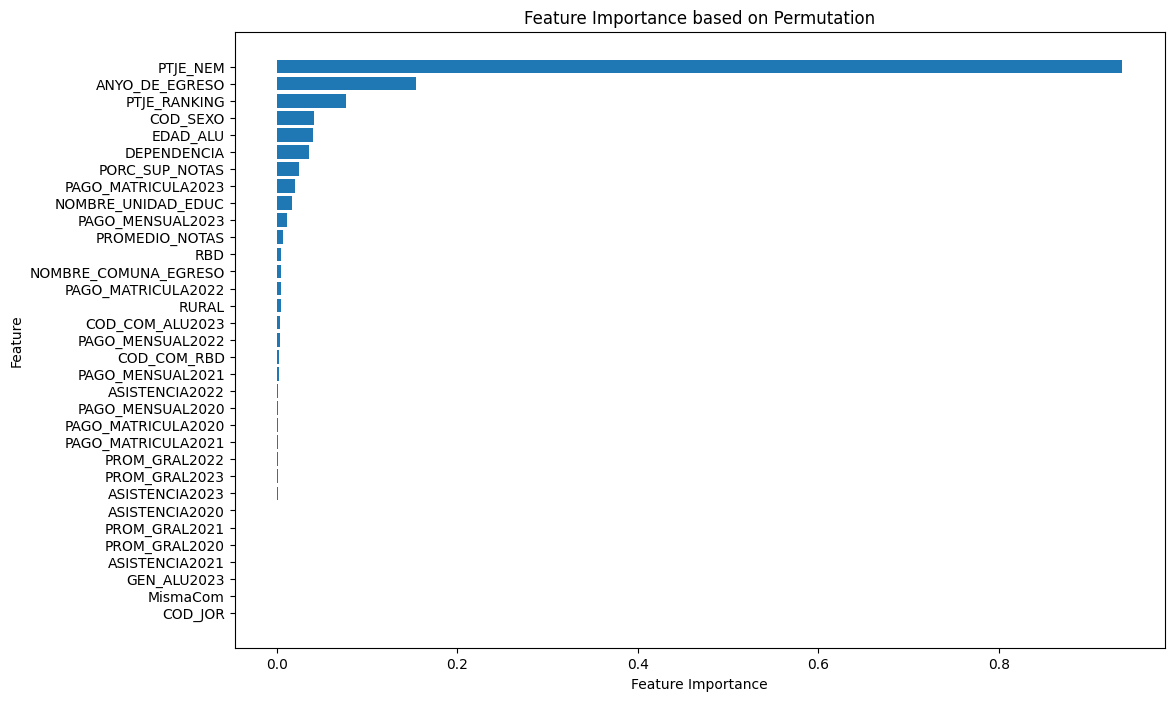

In [26]:
# Calcular la importancia de las características
results = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)

# Obtener la media de la disminución en el score de las predicciones para cada característica
importances = results.importances_mean

# Crear un DataFrame para visualizar mejor la importancia de cada característica
feature_importances = pd.DataFrame({'feature': columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Permutation')
plt.gca().invert_yaxis()
plt.show()

In [27]:
#Model 7
mlp = MLPRegressor(hidden_layer_sizes=(256, 3),  # Ajustar el tamaño y número de capas ocultas
                   activation='relu',  # Función de activación relu
                   solver='adam',  # Optimizador adam
                   alpha=0.001,  # Regularización L2
                   learning_rate='adaptive', # Tasa de aprendizaje adaptive
                   learning_rate_init=0.0001,
                   max_iter=100,  # Aumentar el número máximo de iteraciones
                   batch_size=128,
                   early_stopping=True,
                   random_state=0)

# Entrenar el modelo
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, batch_size=128, early_stopping=True,
             hidden_layer_sizes=(256, 3), learning_rate='adaptive',
             learning_rate_init=0.0001, max_iter=100, random_state=0)

In [28]:
# Hacer predicciones
predictions = mlp.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Testing Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Testing Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Test R-squared: {r2}')

Testing Mean Squared Error: 0.012298701883238058
Testing Mean Absolute Error: 0.08834600256548229
Test R-squared: 0.5148562547317728
